# 5.3.2 Leave-One-Out Cross-Validation (LOOCV)

## Explanation of Leave-One-Out Cross-Validation (LOOCV)

Leave-One-Out Cross-Validation (LOOCV) is a special case of k-fold cross-validation where the number of folds equals the number of data points in the dataset. In LOOCV, for each iteration, a single data point is used as the validation set, and the remaining data points are used as the training set. This process is repeated for each data point in the dataset, resulting in a model that is trained and validated `n` times, where `n` is the number of data points.

## Benefits of LOOCV

1. **Low Bias**: LOOCV provides an almost unbiased estimate of model performance because each data point is used for validation exactly once.
2. **Maximal Data Utilization**: Each data point contributes to the training set in all but one iteration, ensuring that nearly all data is used for training in each iteration.
3. **Robustness**: Suitable for small datasets where splitting the data would otherwise lead to very small training sets.

___
___
### Readings:
- [Leave-One-Out Cross-Validation](https://readmedium.com/en/https:/medium.datadriveninvestor.com/leave-one-out-cross-validation-32fa248c1739)
- [Strengths and Stretches of Leave-One-Out Cross-Validation](https://readmedium.com/en/https:/pub.aimind.so/unveiling-the-strengths-and-stretches-of-leave-one-out-cross-validation-a-comprehensive-431f2490f62a)
- [Leave-One-Out Cross-Validation (LOO-CV)](https://readmedium.com/en/https:/medium.com/aimonks/leave-one-out-cross-validation-loo-cv-an-essential-tool-for-model-validation-and-selection-0214169e146a)
___
___

## Use Cases of LOOCV

1. **Small Datasets**: LOOCV is particularly useful when dealing with small datasets, as it maximizes the use of the available data.
2. **High-Variance Models**: Models with high variance benefit from the LOOCV approach, as it provides a more stable estimate of performance by using different training sets for each iteration.

## Drawbacks of LOOCV

1. **Computationally Expensive**: LOOCV can be computationally intensive, especially for large datasets, as it requires training the model `n` times.
2. **High Variance in Estimates**: The performance estimate from LOOCV can have high variance, as each validation set consists of only one data point.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import LeaveOneOut
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = load_diabetes()
X = data.data
y = data.target

In [3]:
# Initialize LOOCV and the model
loo = LeaveOneOut()
model = LinearRegression()

In [4]:
# Initialize lists to store metrics and predictions
mae_list = []
mse_list = []
true_values = []
predicted_values = []

In [5]:
# Perform LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    true_values.append(y_test[0])
    predicted_values.append(y_pred[0])

In [6]:
# Calculate average metrics
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 44.36
Mean Squared Error (MSE): 3001.75
Root Mean Squared Error (RMSE): 54.79


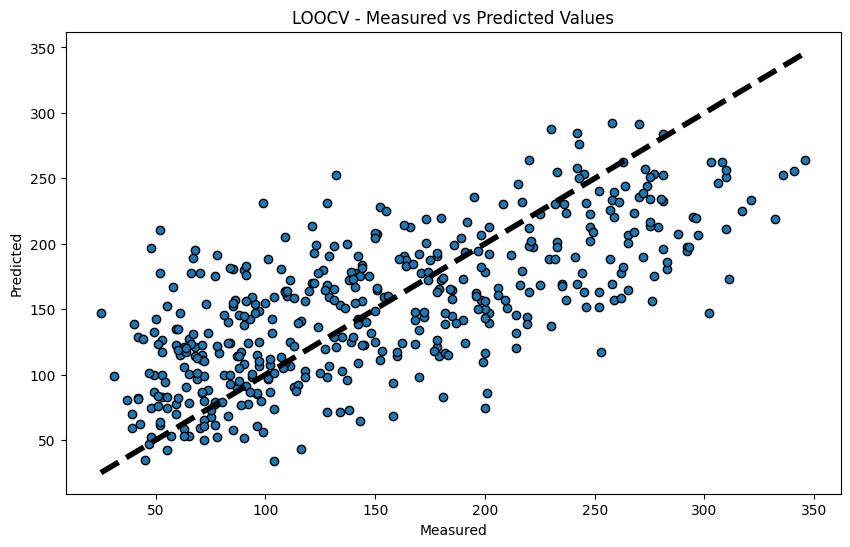

In [7]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predicted_values, edgecolors=(0, 0, 0))
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('LOOCV - Measured vs Predicted Values')
plt.show()

## Conclusion

**Leave-One-Out Cross-Validation (LOOCV)** is a robust validation technique that is particularly useful for small datasets and high-variance models. By using nearly all data for training in each iteration, LOOCV provides a low-bias estimate of model performance. However, it can be computationally expensive for large datasets and may result in high variance in performance estimates. Despite these drawbacks, LOOCV remains a valuable tool for model validation, offering detailed insights into model performance across different data splits.
